In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("./datasets/train.csv")

In [3]:
def preprocess_data(df: pd.DataFrame):
    data = df.copy()

    def normalize_name(names):
        return " ".join([x.strip(",()[].\"'") for x in names.split(" ")])

    def ticket_number(ticket):
        return ticket.split(" ")[-1]

    def ticket_item(ticket):
        items = ticket.split(" ")
        if len(items) == 1:
            return "NONE"
        return "_".join(items[0:-1])

    data["Name"] = data["Name"].apply(normalize_name)
    data["Ticket_number"] = data["Ticket"].apply(ticket_number)
    data["Ticket_item"] = data["Ticket"].apply(ticket_item)

    return data

In [4]:
train_data = preprocess_data(df)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,1,0,3,Braund Mr Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,A/5
1,2,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,PC 17599,71.2833,C85,C,17599,PC
2,3,1,3,Heikkinen Miss Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.
3,4,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,113803,53.1000,C123,S,113803,NONE
4,5,0,3,Allen Mr William Henry,male,35.0,0,0,373450,8.0500,NaN,S,373450,NONE


In [5]:
label_encoder = LabelEncoder()
train_data["Name"] = label_encoder.fit_transform(train_data["Name"])

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,1,0,3,108,male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,A/5
1,2,1,1,190,female,38.0,1,0,PC 17599,71.2833,C85,C,17599,PC
2,3,1,3,353,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.
3,4,1,1,272,female,35.0,1,0,113803,53.1000,C123,S,113803,NONE
4,5,0,3,15,male,35.0,0,0,373450,8.0500,NaN,S,373450,NONE


In [7]:
train_data["Sex"] = label_encoder.fit_transform(train_data["Sex"])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,1,0,3,108,1,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,A/5
1,2,1,1,190,0,38.0,1,0,PC 17599,71.2833,C85,C,17599,PC
2,3,1,3,353,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.
3,4,1,1,272,0,35.0,1,0,113803,53.1000,C123,S,113803,NONE
4,5,0,3,15,1,35.0,0,0,373450,8.0500,NaN,S,373450,NONE


In [8]:
train_data = train_data.drop(columns = "Name")

In [9]:
train_data["Ticket_number"] = np.where(train_data["Ticket_number"] == "LINE", train_data["Ticket_number"].mode()[0], train_data["Ticket_number"])

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,A/5
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,17599,PC
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,113803,NONE
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,373450,NONE


In [11]:
train_data["Ticket_item"] = label_encoder.fit_transform(train_data["Ticket_item"])
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,4
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,17599,18
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,37
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,113803,16
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,373450,16


In [12]:
train_data.Cabin.unique().size

148

In [13]:
train_data["Deck"] = train_data['Cabin'].str.get(0)

In [14]:
train_data["Deck"] = train_data["Deck"].fillna("No_Cabin")

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    int32  
 4   Age            714 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Ticket         891 non-null    object 
 8   Fare           891 non-null    float64
 9   Cabin          204 non-null    object 
 10  Embarked       889 non-null    object 
 11  Ticket_number  891 non-null    object 
 12  Ticket_item    891 non-null    int32  
 13  Deck           891 non-null    object 
dtypes: float64(2), int32(2), int64(5), object(5)
memory usage: 90.6+ KB


In [16]:
df = train_data.copy()

In [17]:
median_age = train_data.groupby(by = ["Pclass", "Sex"], observed = True)["Age"].median().reset_index().rename(columns = { "Age": "Median_age" })
df = pd.merge(train_data, median_age, on = ["Pclass", "Sex"], how = "left")
df["Age"] = df["Age"].fillna(df["Median_age"])
train_df = df.drop(columns = "Median_age")
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item,Deck
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,4,No_Cabin
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,17599,18,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,37,No_Cabin
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,113803,16,C
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,373450,16,No_Cabin


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    int32  
 4   Age            891 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Ticket         891 non-null    object 
 8   Fare           891 non-null    float64
 9   Cabin          204 non-null    object 
 10  Embarked       889 non-null    object 
 11  Ticket_number  891 non-null    object 
 12  Ticket_item    891 non-null    int32  
 13  Deck           891 non-null    object 
dtypes: float64(2), int32(2), int64(5), object(5)
memory usage: 90.6+ KB


In [19]:
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

In [20]:
train_df = train_df.drop(columns = ["Cabin", "Ticket"])

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    int32  
 4   Age            891 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Fare           891 non-null    float64
 8   Embarked       891 non-null    object 
 9   Ticket_number  891 non-null    object 
 10  Ticket_item    891 non-null    int32  
 11  Deck           891 non-null    object 
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


In [22]:
train_df["Embarked"] = label_encoder.fit_transform(train_df["Embarked"])
train_df["Deck"] = label_encoder.fit_transform(train_df["Deck"])

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    int32  
 4   Age            891 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Fare           891 non-null    float64
 8   Embarked       891 non-null    int32  
 9   Ticket_number  891 non-null    object 
 10  Ticket_item    891 non-null    int32  
 11  Deck           891 non-null    int32  
dtypes: float64(2), int32(4), int64(5), object(1)
memory usage: 69.7+ KB


In [24]:
train_df["Ticket_number"] = train_df["Ticket_number"].astype("int64")

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_number,Ticket_item,Deck
0,1,0,3,1,22.0,1,0,7.2500,2,21171,4,7
1,2,1,1,0,38.0,1,0,71.2833,0,17599,18,2
2,3,1,3,0,26.0,0,0,7.9250,2,3101282,37,7
3,4,1,1,0,35.0,1,0,53.1000,2,113803,16,2
4,5,0,3,1,35.0,0,0,8.0500,2,373450,16,7


In [26]:
train_df = train_df.drop(columns = "PassengerId")

In [27]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_number,Ticket_item,Deck
0,0,3,1,22.0,1,0,7.2500,2,21171,4,7
1,1,1,0,38.0,1,0,71.2833,0,17599,18,2
2,1,3,0,26.0,0,0,7.9250,2,3101282,37,7
3,1,1,0,35.0,1,0,53.1000,2,113803,16,2
4,0,3,1,35.0,0,0,8.0500,2,373450,16,7


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int32  
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked       891 non-null    int32  
 8   Ticket_number  891 non-null    int64  
 9   Ticket_item    891 non-null    int32  
 10  Deck           891 non-null    int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 62.8 KB


## Training

In [29]:
X = train_df.drop(columns = "Survived")
y = train_df["Survived"]

In [30]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_number,Ticket_item,Deck
0,3,1,22.0,1,0,7.2500,2,21171,4,7
1,1,0,38.0,1,0,71.2833,0,17599,18,2
2,3,0,26.0,0,0,7.9250,2,3101282,37,7
3,1,0,35.0,1,0,53.1000,2,113803,16,2
4,3,1,35.0,0,0,8.0500,2,373450,16,7


In [31]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

In [33]:
X_scaled = pd.DataFrame(X_scaled, columns = std_scaler.feature_names_in_)
X_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_number,Ticket_item,Deck
0,0.827377,0.737695,-0.534891,0.432793,-0.473674,-0.502445,0.585954,-0.420423,-2.132145,0.511293
1,-1.566107,-1.355574,0.668392,0.432793,-0.473674,0.786845,-1.942303,-0.425867,0.177771,-1.914491
2,0.827377,-1.355574,-0.234070,-0.474545,-0.473674,-0.488854,0.585954,4.274392,3.312657,0.511293
3,-1.566107,-1.355574,0.442776,0.432793,-0.473674,0.420730,0.585954,-0.279230,-0.152217,-1.914491
4,0.827377,0.737695,0.442776,-0.474545,-0.473674,-0.486337,0.585954,0.116533,-0.152217,0.511293


In [34]:
model = RandomForestClassifier()
cross_val_score(model, X_scaled, y).mean()

0.8361747536250078

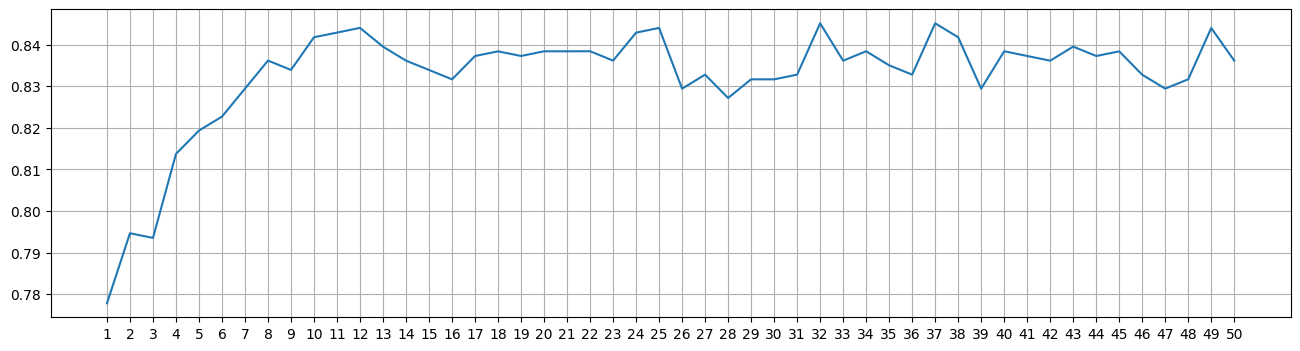

In [35]:
scores = []
for depth in range(1, 51):
    model = RandomForestClassifier(max_depth = depth)
    scores.append(cross_val_score(model, X_scaled, y).mean())

fig, ax = plt.subplots(figsize = (16, 4))
ax.plot(scores)
ax.grid()
ax.set_xticks(range(50), labels = range(1, 51))
plt.show()

In [36]:
np.max(scores), np.argmax(scores)

(0.8451384093904964, 31)

In [37]:
neural_network = MLPClassifier(max_iter = 9999)
cross_val_score(neural_network, X_scaled, y).mean()

0.8002385286548239

In [38]:
neural_network = MLPClassifier(max_iter = 9999)
cross_val_score(neural_network, X_scaled, y, cv = 10).mean()

0.8125717852684146

In [39]:
knn_model = KNeighborsClassifier()
cross_val_score(knn_model, X_scaled, y, cv = 10).mean()

0.7969038701622971

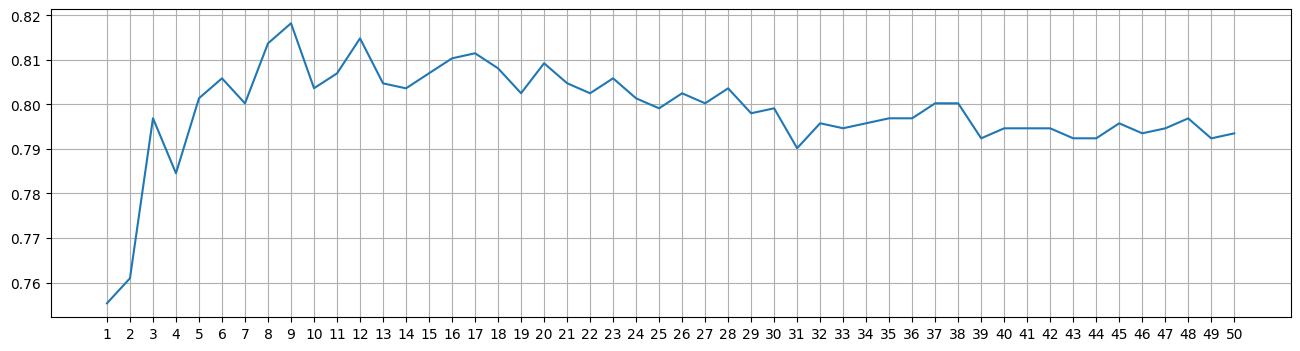

In [40]:
scores = []
for k in range(1, 51):
    model = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    scores.append(cross_val_score(model, X_scaled, y).mean())

fig, ax = plt.subplots(figsize = (16, 4))
ax.plot(scores)
ax.grid()
ax.set_xticks(range(50), labels = range(1, 51))
plt.show()

In [41]:
np.max(scores), np.argmax(scores)

(0.8182097796748478, 8)

In [42]:
lgb_model = LGBMClassifier()
cross_val_score(lgb_model, X_scaled, y).mean()

e:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

0.8327914129684263

In [43]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_number,Ticket_item,Deck
0,3,1,22.0,1,0,7.2500,2,21171,4,7
1,1,0,38.0,1,0,71.2833,0,17599,18,2
2,3,0,26.0,0,0,7.9250,2,3101282,37,7
3,1,0,35.0,1,0,53.1000,2,113803,16,2
4,3,1,35.0,0,0,8.0500,2,373450,16,7


In [44]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Ticket_number', 'Ticket_item', 'Deck'],
      dtype='object')

In [45]:
X = train_df.drop(columns = ["Ticket_number", "Ticket_item", "Survived"])
y = train_df["Survived"]

In [46]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,1,22.0,1,0,7.2500,2,7
1,1,0,38.0,1,0,71.2833,0,2
2,3,0,26.0,0,0,7.9250,2,7
3,1,0,35.0,1,0,53.1000,2,2
4,3,1,35.0,0,0,8.0500,2,7


In [47]:
X["Age"] = std_scaler.fit_transform(X[["Age"]])

In [48]:
X["Fare"] = std_scaler.fit_transform(X[["Fare"]])

In [49]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,1,-0.534891,1,0,-0.502445,2,7
1,1,0,0.668392,1,0,0.786845,0,2
2,3,0,-0.234070,0,0,-0.488854,2,7
3,1,0,0.442776,1,0,0.420730,2,2
4,3,1,0.442776,0,0,-0.486337,2,7


In [50]:
model = RandomForestClassifier()
cross_val_score(model, X, y).mean()

0.8024982738057874

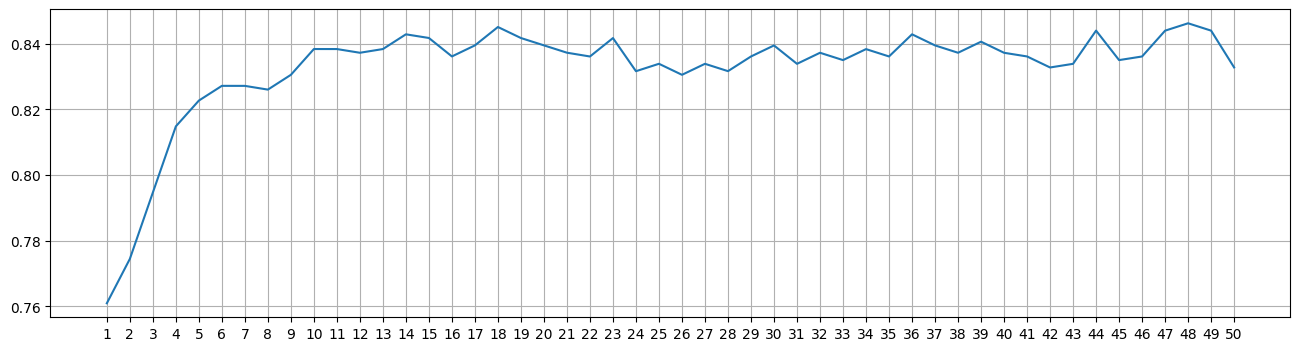

In [51]:
scores = []
for depth in range(1, 51):
    model = RandomForestClassifier(max_depth = depth)
    scores.append(cross_val_score(model, X_scaled, y).mean())

fig, ax = plt.subplots(figsize = (16, 4))
ax.plot(scores)
ax.grid()
ax.set_xticks(range(50), labels = range(1, 51))
plt.show()

In [52]:
np.max(scores), np.argmax(scores)+1

(0.8462620048961146, 48)

In [53]:
from sklearn.model_selection import StratifiedKFold, KFold

In [55]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': range(3, 21),
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# Initialize model and grid search
rf = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(
    estimator = rf, 
    param_grid = param_grid, 
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42), 
    n_jobs = -1
)

# Fit grid search to data
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 21), 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100, 150]})

In [56]:
# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8394953235829515


In [57]:
X.to_csv("./datasets/preprocessed_train.csv", index = False)

## Testing

In [58]:
test_df = pd.read_csv("./datasets/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [60]:
df = test_df.copy()

In [61]:
median_age = df.groupby(by = ["Pclass", "Sex"], observed = True)["Age"].median().reset_index().rename(columns = { "Age": "Median_age" })
df = pd.merge(df, median_age, on = ["Pclass", "Sex"], how = "left")
df["Age"] = df["Age"].fillna(df["Median_age"])
test_df = df.drop(columns = "Median_age")

In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [63]:
df = test_df.copy()

In [64]:
median_fare = df.groupby(by = ["Pclass", "Embarked"], observed = True)["Fare"].median().reset_index().rename(columns = { "Fare": "Median_fare" })

In [ ]:
median_fare = df.groupby(by = ["Pclass", "Embarked"], observed = True)["Fare"].median().reset_index().rename(columns = { "Fare": "Median_fare" })
df = pd.merge(df, median_fare, on = ["Pclass", "Embarked"], how = "left")
df["Fare"] = df["Fare"].fillna(df["Median_fare"])
test_df = df.drop(columns = "Median_fare")

In [66]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [67]:
test_df["Deck"] = test_df['Cabin'].str.get(0)

In [68]:
test_df["Deck"] = test_df["Deck"].fillna("No_cabin")

In [69]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Deck         418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [70]:
test_df = test_df.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin"])
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,male,34.5,0,0,7.8292,Q,No_cabin
1,3,female,47.0,1,0,7.0000,S,No_cabin
2,2,male,62.0,0,0,9.6875,Q,No_cabin
3,3,male,27.0,0,0,8.6625,S,No_cabin
4,3,female,22.0,1,1,12.2875,S,No_cabin


In [71]:
label_encoder = LabelEncoder()

In [72]:
test_df["Sex"] = label_encoder.fit_transform(test_df["Sex"])
test_df["Embarked"] = label_encoder.fit_transform(test_df["Embarked"])
test_df["Deck"] = label_encoder.fit_transform(test_df["Deck"])

In [73]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,1,34.5,0,0,7.8292,1,7
1,3,0,47.0,1,0,7.0000,2,7
2,2,1,62.0,0,0,9.6875,1,7
3,3,1,27.0,0,0,8.6625,2,7
4,3,0,22.0,1,1,12.2875,2,7


In [74]:
std_scaler = StandardScaler()

In [75]:
test_df["Age"] = std_scaler.fit_transform(test_df[["Age"]])
test_df["Fare"] = std_scaler.fit_transform(test_df[["Fare"]])

In [76]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,1,0.399451,0,0,-0.497079,1,7
1,3,0,1.359273,1,0,-0.511942,2,7
2,2,1,2.511059,0,0,-0.463770,1,7
3,3,1,-0.176442,0,0,-0.482143,2,7
4,3,0,-0.560371,1,1,-0.417167,2,7


In [77]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
 7   Deck      418 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 21.4 KB


In [78]:
X_test = test_df.copy()

In [79]:
prediction = grid_search.best_estimator_.predict(X_test)

In [80]:
pred_df = pd.DataFrame(prediction, columns = ["Survived"])
pred_df.head(5)

,Survived
0,0
1,0
2,0
3,0
4,0


In [81]:
pred_df["PassengerId"] = pred_df.index
pred_df

,Survived,PassengerId
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
413,0,413
414,1,414
415,0,415
416,0,416


In [82]:
pred_df = pred_df[["PassengerId", "Survived"]]
pred_df

,PassengerId,Survived
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
413,413,0
414,414,1
415,415,0
416,416,0


In [83]:
pred_df.to_csv("./results/prediction.csv", index = False)

In [84]:
pred_df.index = range(892, 892 + len(pred_df))

In [85]:
pred_df.reset_index()

,index,PassengerId,Survived
0,892,0,0
1,893,1,0
2,894,2,0
3,895,3,0
4,896,4,0
...,...,...,...
413,1305,413,0
414,1306,414,1
415,1307,415,0
416,1308,416,0


In [86]:
pred_df = pred_df.drop(columns = "PassengerId")

In [87]:
pred_df["PassengerId"] = range(892, 892 + len(pred_df))

In [88]:
pred_df

,Survived,PassengerId
892,0,892
893,0,893
894,0,894
895,0,895
896,0,896
...,...,...
1305,0,1305
1306,1,1306
1307,0,1307
1308,0,1308


In [89]:
pred_df = pred_df[["PassengerId", "Survived"]]

In [90]:
pred_df.to_csv("./results/prediction.csv", index = False)

In [92]:
X_test.to_csv("./datasets/preprocessed_test.csv", index = False)

In [93]:
X_train = pd.read_csv("./datasets/preprocessed_train.csv")
X_test = pd.read_csv("./datasets/preprocessed_test.csv")

In [96]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,1,-0.534891,1,0,-0.502445,2,7
1,1,0,0.668392,1,0,0.786845,0,2
2,3,0,-0.234070,0,0,-0.488854,2,7
3,1,0,0.442776,1,0,0.420730,2,2
4,3,1,0.442776,0,0,-0.486337,2,7


In [97]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_number,Ticket_item,Deck
0,0,3,1,22.0,1,0,7.2500,2,21171,4,7
1,1,1,0,38.0,1,0,71.2833,0,17599,18,2
2,1,3,0,26.0,0,0,7.9250,2,3101282,37,7
3,1,1,0,35.0,1,0,53.1000,2,113803,16,2
4,0,3,1,35.0,0,0,8.0500,2,373450,16,7


In [98]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


LGBMClassifier()

In [99]:
y_pred = lgb_model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [108]:
pred_df = pd.DataFrame(y_pred, columns = ["Survived"])
pred_df.head()

,Survived
0,0
1,0
2,0
3,1
4,0


In [109]:
pred_df["PassengerId"] = range(892, 892+418)

In [110]:
pred_df[["PassengerId", "Survived"]].to_csv("./results/lgbm_prediction.csv", index = False)

In [111]:
X_pred = X_test.copy()
X_pred

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,1,0.399451,0,0,-0.497079,1,7
1,3,0,1.359273,1,0,-0.511942,2,7
2,2,1,2.511059,0,0,-0.463770,1,7
3,3,1,-0.176442,0,0,-0.482143,2,7
4,3,0,-0.560371,1,1,-0.417167,2,7
...,...,...,...,...,...,...,...,...
413,3,1,-0.406799,0,0,-0.493121,2,7
414,1,0,0.744987,0,0,1.314552,0,2
415,3,1,0.706594,0,0,-0.507461,2,7
416,3,1,-0.406799,0,0,-0.493121,2,7


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,1,-0.534891,1,0,-0.502445,2,7
1,1,0,0.668392,1,0,0.786845,0,2
2,3,0,-0.234070,0,0,-0.488854,2,7
3,1,0,0.442776,1,0,0.420730,2,2
4,3,1,0.442776,0,0,-0.486337,2,7
...,...,...,...,...,...,...,...,...
886,2,1,-0.158865,0,0,-0.386671,2,7
887,1,0,-0.760507,0,0,-0.044381,2,1
888,3,0,-0.572494,1,2,-0.176263,2,7
889,1,1,-0.234070,0,0,-0.044381,0,2


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'num_leaves': [31, 62, 127],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'subsample': [0.5, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}

# Initialize LightGBM classifier
lgb_model = LGBMClassifier(objective='binary', random_state=42)

# Perform grid search
grid_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid, n_iter = 100, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [122]:
lgbm_pred = best_model.predict(X_pred)
lgbm_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [123]:
df = pd.read_csv("./results/lgbm_prediction.csv")
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [124]:
df["Survived"] = lgbm_pred

In [125]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [126]:
df.sample(10)

,PassengerId,Survived
223,1115,0
225,1117,0
69,961,1
340,1232,0
390,1282,0
148,1040,0
227,1119,1
283,1175,1
214,1106,0
291,1183,1


In [127]:
df.to_csv("./results/lgbm_prediction.csv", index = False)

In [3]:
train_df = pd.read_csv("./datasets/preprocessed_train.csv")
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,1,-0.534891,1,0,-0.502445,2,7
1,1,0,0.668392,1,0,0.786845,0,2
2,3,0,-0.234070,0,0,-0.488854,2,7
3,1,0,0.442776,1,0,0.420730,2,2
4,3,1,0.442776,0,0,-0.486337,2,7


In [4]:
test_df = pd.read_csv("./datasets/preprocessed_test.csv")
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,1,0.399451,0,0,-0.497079,1,7
1,3,0,1.359273,1,0,-0.511942,2,7
2,2,1,2.511059,0,0,-0.463770,1,7
3,3,1,-0.176442,0,0,-0.482143,2,7
4,3,0,-0.560371,1,1,-0.417167,2,7


In [5]:
train_df_raw = pd.read_csv("./datasets/train.csv")
train_df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df["Family_size"] = train_df["SibSp"] + train_df["Parch"] + 1
train_df["Title"] = train_df_raw["Name"].str.extract("([A-Za-z]+)\.")
train_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\andre\AppData\Local\Temp\ipykernel_5312\4071490054.py:2: SyntaxWarning: invalid escape sequence '\.'
  train_df["Title"] = train_df_raw["Name"].str.extract("([A-Za-z]+)\.")


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_size,Title
0,3,1,-0.534891,1,0,-0.502445,2,7,2,Mr
1,1,0,0.668392,1,0,0.786845,0,2,2,Mrs
2,3,0,-0.234070,0,0,-0.488854,2,7,1,Miss
3,1,0,0.442776,1,0,0.420730,2,2,2,Mrs
4,3,1,0.442776,0,0,-0.486337,2,7,1,Mr


In [7]:
train_df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [8]:
test_df_raw = pd.read_csv("./datasets/test.csv")

In [9]:
test_df["Family_size"] = test_df["SibSp"] + test_df["Parch"] + 1
test_df["Title"] = test_df_raw["Name"].str.extract("([A-Za-z]+)\.")

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\andre\AppData\Local\Temp\ipykernel_5312\3820416516.py:2: SyntaxWarning: invalid escape sequence '\.'
  test_df["Title"] = test_df_raw["Name"].str.extract("([A-Za-z]+)\.")


In [13]:
std_scaler = StandardScaler()

In [15]:
train_df["Age"] = train_df_raw["Age"]

In [17]:
train_df["Fare"] = train_df_raw["Fare"]

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    int64  
 7   Deck         891 non-null    int64  
 8   Family_size  891 non-null    int64  
 9   Title        891 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 69.7+ KB


In [20]:
test_df["Age"] = test_df_raw["Age"]
test_df["Fare"] = test_df_raw["Fare"]

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    int64  
 2   Age          332 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Deck         418 non-null    int64  
 8   Family_size  418 non-null    int64  
 9   Title        418 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 32.8+ KB


In [22]:
label_encoder = LabelEncoder()

In [23]:
label_encoder.fit(train_df["Title"])

LabelEncoder()

In [26]:
ordinal_encoder = OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1)
ordinal_encoder.fit(train_df[["Title"]])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [28]:
train_df["Title_encoded"] = ordinal_encoder.transform(train_df[["Title"]])
test_df["Title_encoded"] = ordinal_encoder.transform(test_df[["Title"]])

In [30]:
train_df["Title_encoded"].unique()

array([12., 13.,  9.,  8.,  3., 15.,  4., 11., 14.,  7.,  6., 16., 10.,
        1.,  0.,  2.,  5.])

In [31]:
test_df["Title_encoded"].unique()

array([12., 13.,  9.,  8., 14.,  1., 15.,  4., -1.])

In [36]:
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_size,Title,Title_encoded,Age_Scaled,Fare_Scaled
0,3,1,22.0,1,0,7.2500,2,7,2,Mr,12.0,RobustScaler(),RobustScaler()
1,1,0,38.0,1,0,71.2833,0,2,2,Mrs,13.0,RobustScaler(),RobustScaler()
2,3,0,26.0,0,0,7.9250,2,7,1,Miss,9.0,RobustScaler(),RobustScaler()
3,1,0,35.0,1,0,53.1000,2,2,2,Mrs,13.0,RobustScaler(),RobustScaler()
4,3,1,35.0,0,0,8.0500,2,7,1,Mr,12.0,RobustScaler(),RobustScaler()


In [47]:
median_age = train_df.groupby(by = ["Pclass", "Sex"], observed = True)["Age"].median().reset_index().rename(columns = { "Age": "Median_age" })
df = pd.merge(train_df, median_age, on = ["Pclass", "Sex"], how = "left")
df["Age"] = df["Age"].fillna(df["Median_age"])
train_df = df.drop(columns = "Median_age")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Sex            891 non-null    int64  
 2   Age            891 non-null    float64
 3   SibSp          891 non-null    int64  
 4   Parch          891 non-null    int64  
 5   Fare           891 non-null    float64
 6   Embarked       891 non-null    int64  
 7   Deck           891 non-null    int64  
 8   Family_size    891 non-null    int64  
 9   Title          891 non-null    object 
 10  Title_encoded  891 non-null    float64
 11  Age_scaled     714 non-null    float64
 12  Fare_scaled    891 non-null    float64
dtypes: float64(5), int64(7), object(1)
memory usage: 90.6+ KB


In [48]:
median_age = test_df.groupby(by = ["Pclass", "Sex"], observed = True)["Age"].median().reset_index().rename(columns = { "Age": "Median_age" })
df = pd.merge(test_df, median_age, on = ["Pclass", "Sex"], how = "left")
df["Age"] = df["Age"].fillna(df["Median_age"])
test_df = df.drop(columns = "Median_age")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    int64  
 2   Age            418 non-null    float64
 3   SibSp          418 non-null    int64  
 4   Parch          418 non-null    int64  
 5   Fare           417 non-null    float64
 6   Embarked       418 non-null    int64  
 7   Deck           418 non-null    int64  
 8   Family_size    418 non-null    int64  
 9   Title          418 non-null    object 
 10  Title_encoded  418 non-null    float64
 11  Age_scaled     332 non-null    float64
 12  Fare_scaled    417 non-null    float64
dtypes: float64(5), int64(7), object(1)
memory usage: 42.6+ KB


In [49]:
median_fare = train_df.groupby(by = ["Pclass", "Embarked"], observed = True)["Fare"].median().reset_index().rename(columns = { "Fare": "Median_fare" })
df = pd.merge(train_df, median_fare, on = ["Pclass", "Embarked"], how = "left")
df["Fare"] = df["Fare"].fillna(df["Median_fare"])
train_df = df.drop(columns = "Median_fare")

In [50]:
median_fare = test_df.groupby(by = ["Pclass", "Embarked"], observed = True)["Fare"].median().reset_index().rename(columns = { "Fare": "Median_fare" })
df = pd.merge(test_df, median_fare, on = ["Pclass", "Embarked"], how = "left")
df["Fare"] = df["Fare"].fillna(df["Median_fare"])
test_df = df.drop(columns = "Median_fare")

In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    int64  
 2   Age            418 non-null    float64
 3   SibSp          418 non-null    int64  
 4   Parch          418 non-null    int64  
 5   Fare           418 non-null    float64
 6   Embarked       418 non-null    int64  
 7   Deck           418 non-null    int64  
 8   Family_size    418 non-null    int64  
 9   Title          418 non-null    object 
 10  Title_encoded  418 non-null    float64
 11  Age_scaled     332 non-null    float64
 12  Fare_scaled    417 non-null    float64
dtypes: float64(5), int64(7), object(1)
memory usage: 42.6+ KB


In [53]:
age_scaler = RobustScaler()
fare_scaler = RobustScaler()

In [54]:
age_scaler.fit(train_df[['Age']])
fare_scaler.fit(train_df[['Fare']])

RobustScaler()

In [55]:
train_df["Age_scaled"] = age_scaler.transform(train_df[['Age']])
test_df["Age_scaled"] = age_scaler.transform(test_df[['Age']])

train_df["Fare_scaled"] = fare_scaler.transform(train_df[['Fare']])
test_df["Fare_scaled"] = fare_scaler.transform(test_df[['Fare']])

In [56]:
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_size,Title,Title_encoded,Age_scaled,Fare_scaled
0,3,1,22.0,1,0,7.2500,2,7,2,Mr,12.0,-0.275862,-0.312011
1,1,0,38.0,1,0,71.2833,0,2,2,Mrs,13.0,0.827586,2.461242
2,3,0,26.0,0,0,7.9250,2,7,1,Miss,9.0,0.000000,-0.282777
3,1,0,35.0,1,0,53.1000,2,2,2,Mrs,13.0,0.620690,1.673732
4,3,1,35.0,0,0,8.0500,2,7,1,Mr,12.0,0.620690,-0.277363


In [65]:
train_df = train_df.drop(columns = ["Age", "Fare"])

In [66]:
test_df = test_df.drop(columns = ["Age", "Fare"])

In [67]:
test_df.head()

,Pclass,Sex,SibSp,Parch,Embarked,Deck,Family_size,Title_encoded,Age_scaled,Fare_scaled
0,3,1,0,0,1,7,1,12.0,0.586207,-0.286926
1,3,0,1,0,2,7,2,13.0,1.448276,-0.322838
2,2,1,0,0,1,7,1,12.0,2.482759,-0.206444
3,3,1,0,0,2,7,1,12.0,0.068966,-0.250836
4,3,0,1,1,2,7,3,13.0,-0.275862,-0.093839


In [69]:
X = train_df.copy()
y = train_df_raw["Survived"]

In [70]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [71]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Deck,Family_size,Title_encoded,Age_scaled,Fare_scaled
0,3,1,1,0,2,7,2,12.0,-0.275862,-0.312011
1,1,0,1,0,0,2,2,13.0,0.827586,2.461242
2,3,0,0,0,2,7,1,9.0,0.000000,-0.282777
3,1,0,1,0,2,2,2,13.0,0.620690,1.673732
4,3,1,0,0,2,7,1,12.0,0.620690,-0.277363


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'num_leaves': [31, 62, 127],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'subsample': [0.5, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}

# Initialize LightGBM classifier
lgb_model = LGBMClassifier(objective='binary', random_state=42)

# Perform grid search
grid_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid, n_iter = 100, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [75]:
X_pred = test_df.copy()
X_pred.head()

,Pclass,Sex,SibSp,Parch,Embarked,Deck,Family_size,Title_encoded,Age_scaled,Fare_scaled
0,3,1,0,0,1,7,1,12.0,0.586207,-0.286926
1,3,0,1,0,2,7,2,13.0,1.448276,-0.322838
2,2,1,0,0,1,7,1,12.0,2.482759,-0.206444
3,3,1,0,0,2,7,1,12.0,0.068966,-0.250836
4,3,0,1,1,2,7,3,13.0,-0.275862,-0.093839


In [76]:
y_pred = best_model.predict(X_pred)

In [78]:
y_pred_df = pd.DataFrame(y_pred, columns = ["Survived"])

In [79]:
y_pred_df["PassengerId"] = range(892, 892+418)

In [81]:
y_pred_df[["PassengerId", "Survived"]].to_csv("./results/improved_features_lgbm.csv", index = False)

In [4]:
train_df_raw = pd.read_csv("./datasets/train.csv")
test_df_raw = pd.read_csv("./datasets/test.csv")

In [8]:
train_df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
train_df = train_df_raw.copy()

In [99]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
train_df["Age"] = train_df.groupby(by = ['Sex', 'Pclass'], observed=True)["Age"].transform(lambda x: x.fillna(x.median()))

In [101]:
train_df["Embarked"] = train_df["Embarked"].fillna("S")

In [102]:
train_df["Family_Size"] = train_df["SibSp"] + train_df["Parch"] + 1

In [103]:
train_df["Family_Size"] = train_df["Family_Size"].map({1: "Alone", 2: "Small", 3: "Small", 4: "Small", 5: "Medium", 6: "Medium", 7: "Large", 8: "Large", 11: "Large"})

In [104]:
train_df["Title"] = train_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [105]:
train_df['Title'] = train_df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
train_df['Title'] = train_df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

In [106]:
train_df["Deck"] = train_df["Cabin"].str.get(0)

In [107]:
train_df["Deck"] = train_df["Deck"].fillna("M")

In [108]:
non_numerical_features = ["Sex", "Age", "Fare", "Embarked", "Family_Size", "Title", "Deck"]

In [109]:
for feature in non_numerical_features:
    train_df[feature] = LabelEncoder().fit_transform(train_df[feature])

In [110]:
onehot_features = ["Pclass", "Sex", "Deck", "Embarked", "Family_Size", "Title"]

In [111]:
encoded_features = []

In [112]:
for feature in onehot_features:
    encoded_feat = OneHotEncoder().fit_transform(train_df[feature].values.reshape(-1, 1)).toarray()
    n = train_df[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = train_df.index
    encoded_features.append(encoded_df)

In [113]:
train_df = pd.concat([train_df, *encoded_features[:6]], axis=1)

In [114]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Title',
       'Deck', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1', 'Sex_2', 'Deck_1',
       'Deck_2', 'Deck_3', 'Deck_4', 'Deck_5', 'Deck_6', 'Deck_7', 'Deck_8',
       'Deck_9', 'Embarked_1', 'Embarked_2', 'Embarked_3', 'Family_Size_1',
       'Family_Size_2', 'Family_Size_3', 'Family_Size_4', 'Title_1', 'Title_2',
       'Title_3', 'Title_4'],
      dtype='object')

In [115]:
X = train_df.drop(columns = ["PassengerId", "Survived", "Name", "Sex", "SibSp", "Parch", "Ticket", "Cabin", "Title", "Deck"])
y = train_df["Survived"]

In [116]:
X.head()

,Pclass,Age,Fare,Embarked,Family_Size,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,...,Embarked_2,Embarked_3,Family_Size_1,Family_Size_2,Family_Size_3,Family_Size_4,Title_1,Title_2,Title_3,Title_4
0,3,29,18,2,3,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,52,207,0,3,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,35,41,2,0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,48,189,2,3,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3,48,43,2,0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [117]:
X_train = StandardScaler().fit_transform(X)

In [120]:
rf_model = RandomForestClassifier(n_estimators = 100)
cross_val_score(rf_model, X_train, y).mean()

0.80248571966606

In [122]:
knn_model = KNeighborsClassifier(n_neighbors = 6)
cross_val_score(knn_model, X_train, y).mean()

0.8170610758897746

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y)
y_pred = dt_model.predict()

0.7889962965287804

In [ ]:
rf_model = RandomForestClassifier()